In [98]:
import os
import matplotlib.pyplot as plt
import numpy as np

path = "/data/users/rockyliu/fbsource/fbcode/experimental/rockyliu/mnist/data/"
testInput = "t10k-images-idx3-ubyte"
testLabel = "t10k-labels-idx1-ubyte"

with open(path + testInput, "rb") as f:
    eval_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28, 28)

with open(path + testLabel, "rb") as f:
    labels = np.frombuffer(f.read(), np.uint8, offset=8)

def getTitle(index, probs, output):
    return "O={} L={} OP={:.2F} LP={:.2F}".format(output, labels[index], float(probs[output]) * 100, float(probs[labels[index]]) * 100)

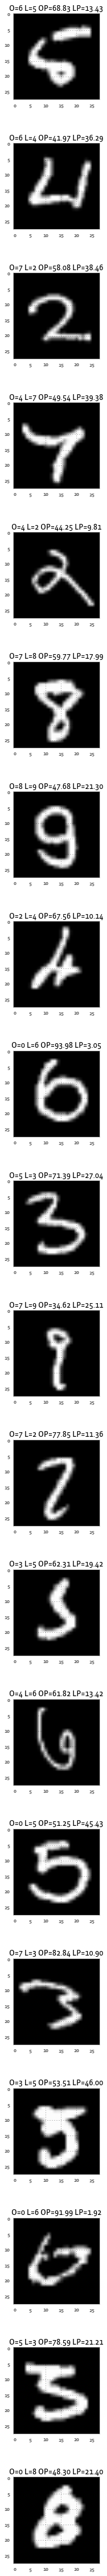

In [99]:
def show_images(images, titles, cols = 1):
    n_images = len(images)
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(np.ceil(n_images/float(cols)), cols, n + 1)
        plt.imshow(image, cmap='gray')
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
evalPath = "../evaluation.out"

with open(path + evalPath, "r") as f:
    lines = [x for x in f][:20]
    images = [eval_images[int(line.split()[0])] for line in lines]
    titles = [getTitle(int(line.split()[0]), line.split()[2:12], int(line.split()[13])) for line in lines]
    show_images(images, titles, 1)

'c'